In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deeponet import DeepONet3D,DPDON3D
import torch
from utils import *

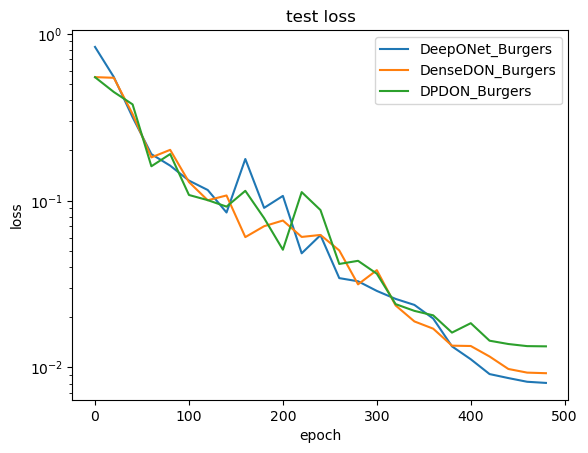

In [3]:
model_name=['DeepONet','DenseDON','DPDON']
pde_name=['Burgers']
for model in model_name:
    for pde in pde_name:
        test_loss=np.load(f'test_history_{model}_{pde}.npy')
        epoch=np.arange(len(test_loss))*20
        plt.plot(epoch,test_loss,label=model+'_'+pde)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.yscale('log')
        plt.legend()
        plt.title('test loss')

plt.savefig('DeepOnet.png')

In [5]:
model_name=['DeepONet','DPDON']
pde_name='Navier_Stokes_2D'
model=DeepONet3D(size=64,
                    query_dim= 3,
                    time_step=10)
model1=DPDON3D(size=64,
                    query_dim= 3,
                    time_step=10)
model.load_state_dict(torch.load(f'DeepOnet_{model_name[0]}_{pde_name}.pt'))
model1.load_state_dict(torch.load(f'DeepOnet_{model_name[1]}_{pde_name}.pt'))
train_loader,test_loader=get_dataloader(pde_name,900,100,1)


In [24]:
data=next(iter(test_loader))
x,y,grid=data

In [25]:
y=y.squeeze().detach().cpu().numpy()
y=y[:,:,-1]

In [26]:
y1=model(x,grid)
y2=model1(x,grid)
y1=y1.squeeze().detach().cpu().numpy()
y2=y2.squeeze().detach().cpu().numpy()
y1=y1.reshape([64,64,10])
y2=y2.reshape([64,64,10])
y1=y1[:,:,-1]
y2=y2[:,:,-1]

/tmp/ipykernel_14737/2310905456.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


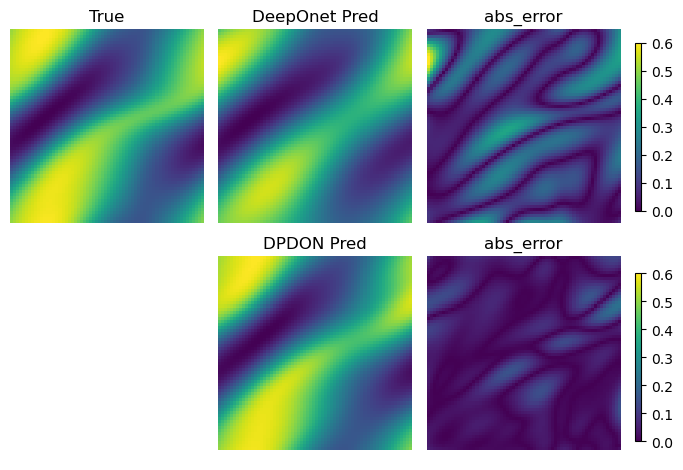

In [30]:
fig, axs = plt.subplots(2, 3)

im0 = axs[0,0].imshow(y, cmap='viridis')  
axs[0,0].set_title('True')  
axs[0,0].axis('off')  # 关闭坐标轴  

# 第一行绘制FNO    
im1 = axs[0,1].imshow(y1, cmap='viridis')  
axs[0,1].set_title('DeepOnet Pred')  
axs[0,1].axis('off')  

  
im2 = axs[0,2].imshow(abs(y-y1), cmap='viridis',vmin=0,vmax=0.6)  
axs[0,2].set_title('abs_error')  
axs[0,2].axis('off')  

# 第二行绘制DPFNO  
# 示例数据  
im3 = axs[1,1].imshow(y2, cmap='viridis')  
axs[1,1].set_title('DPDON Pred')  
axs[1,1].axis('off')  

# 第二行绘制abs_error    
im4 = axs[1,2].imshow(abs(y-y2), cmap='viridis',vmin=0,vmax=0.6)  
axs[1,2].set_title('abs_error')  
axs[1,2].axis('off')  

# 隐藏第二行第一个位置的空白图  
axs[1,0].axis('off')  # 关闭坐标轴并隐藏内容  

# 添加第二行的colorbar，放在右侧  
cbar_ax1 = fig.add_axes([1.00, 0.55, 0.01, 0.35])  # [左, 下, 宽, 高]  
cbar1 = fig.colorbar(im2, cax=cbar_ax1)  
 

# 添加第二行的colorbar，放在右侧  
cbar_ax2 = fig.add_axes([1.00, 0.07, 0.01, 0.35])  # [左, 下, 宽, 高]  
cbar2 = fig.colorbar(im4, cax=cbar_ax2)  
#cbar2.set_ticks([0.2,0.4,0.6])
# 调整整个图表的布局  
plt.tight_layout()  

# 保存图表为PNG文件，分辨率设置为300 DPI  
plt.savefig(f'{pde_name}.png', bbox_inches='tight')  

# 显示图表  
plt.show()  

In [1]:
import numpy as np
loss=np.load('test_history_DeepONet_Burgers.npy')
min(loss)

0.008073454191231956

In [3]:
loss1=np.load('test_history_DPDON_Burgers.npy')
min(loss1)

0.005840905052154911

In [4]:
(min(loss)-min(loss1))/min(loss)

0.27652961002759746